In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.preprocessing import MinMaxScaler


## LSTM

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:

# ====== Configuration ======
file_path = r"C:\Users\Ulices_Chingo\Desktop\Paper\IA\valid_csv_concatenado_invertido_con_60min.csv"
ventana = 60
epocas = 20
batch_size = 32

# ====== upload ======
df = pd.read_csv(file_path, parse_dates=['timestamp'])

# Date of our interest 
df = df[(df['timestamp'] >= '2023-01-01') & (df['timestamp'] <= '2023-06-30')]

# Using the "close" column
data = df[['close']].values
fechas = df['timestamp'].values

# Scaled
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ====== Split ======
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - ventana:]

# ====== Make sequences ======
def crear_secuencias(data, ventana):
    X, y = [], []
    for i in range(ventana, len(data)):
        X.append(data[i - ventana:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = crear_secuencias(train_data, ventana)
X_test, y_test = crear_secuencias(test_data, ventana)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# ====== Model LSTM ======
model_seq = Sequential()
model_seq.add(LSTM(units=50, return_sequences=False, input_shape=(ventana, 1)))
model_seq.add(Dense(1))
model_seq.compile(optimizer='adam', loss='mean_squared_error')

model_seq.fit(X_train, y_train, epochs=epocas, batch_size=batch_size, verbose=1)

# ====== Prediction ======
predictions_LSTM = model_seq.predict(X_test)
predictions_inverse_LSTM = scaler.inverse_transform(predictions_LSTM.reshape(-1, 1))
y_test_inverse_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))



c:\Users\Ulices_Chingo\Desktop\Paper\IA\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0384
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 7.6668e-04
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.1563e-04
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 1.6388e-04
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 1.5884e-04
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 1.6073e-04
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.6488e-04
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 1.4789e-04
Epoch 9/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 1.4814e-04
Epoch 10/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 1.3843e-04
Epoch 11/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 1.3016e-04
Epoch 12/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 1.4598e-04
Epoch 13/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 1.2923e-04
Epoch 14/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 1.2661e-04
Epoch 15/20
48/48 ━

In [4]:
# ====== Metrics ======
mae = mean_absolute_error(y_test_inverse_LSTM, predictions_inverse_LSTM)
mse = mean_squared_error(y_test_inverse_LSTM, predictions_inverse_LSTM)
mape = np.mean(np.abs((y_test_inverse_LSTM - predictions_inverse_LSTM) / y_test_inverse_LSTM)) * 100

mae, mse, mape

(0.6796011362995593, 1.1291002517975621, np.float64(1.6882277831321697))

## CNN

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten

In [7]:
# ====== Configuration ======
file_path = r"C:\Users\Ulices_Chingo\Desktop\Paper\IA\valid_csv_concatenado_invertido_con_60min.csv"
ventana = 60
epocas = 20
batch_size = 32

# ====== Upload ======
df = pd.read_csv(file_path, parse_dates=['timestamp'])

# Select dates
df = df[(df['timestamp'] >= '2023-01-01') & (df['timestamp'] <= '2023-06-30')]

# Using column colse
data = df[['close']].values
fechas = df['timestamp'].values

# Scaled
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ====== Split ======
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - ventana:]

# ====== Make sequences ======
def crear_secuencias(data, ventana):
    X, y = [], []
    for i in range(ventana, len(data)):
        X.append(data[i - ventana:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = crear_secuencias(train_data, ventana)
X_test, y_test = crear_secuencias(test_data, ventana)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# ====== CNN Model ======
model_CNN = Sequential()
model_CNN.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(ventana, 1)))
model_CNN.add(Flatten())
model_CNN.add(Dense(50, activation='relu'))
model_CNN.add(Dense(1))
model_CNN.compile(optimizer='adam', loss='mean_squared_error')

model_CNN.fit(X_train, y_train, epochs=epocas, batch_size=batch_size, verbose=1)

# ====== Prediction ======
predictions_CNN = model_CNN.predict(X_test)
predictions_inverse_CNN = scaler.inverse_transform(predictions_CNN.reshape(-1, 1))
y_test_inverse_CNN = scaler.inverse_transform(y_test.reshape(-1, 1))


Epoch 1/20


c:\Users\Ulices_Chingo\Desktop\Paper\IA\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0139
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1089e-04
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.6885e-04
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9415e-04
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5071e-04
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8695e-04
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4982e-04
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7129e-04
Epoch 9/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.5179e-04
Epoch 10/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.7256e-04
Epoch 11/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.2156e-04
Epoch 12/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.0670e-04
Epoch 13/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.3586e-04
Epoch 14/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.0396e-04
Epoch 15/20
48/48 ━━━━━━━━━━━━━━━━━━━━

In [8]:
# ====== Metrics ======
mae = mean_absolute_error(y_test_inverse_CNN, predictions_inverse_CNN)
mse = mean_squared_error(y_test_inverse_CNN, predictions_inverse_CNN)
mape = np.mean(np.abs((y_test_inverse_CNN - predictions_inverse_CNN) / y_test_inverse_CNN)) * 100

mae, mse, mape

(0.7471123454524781, 1.444887764901365, np.float64(1.8764911790566792))

## ARIMA

In [10]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm


In [11]:
file_path = r"C:\Users\Ulices_Chingo\Desktop\Paper\IA\valid_csv_concatenado_invertido_con_60min.csv"

# ====== Upload ======
data = pd.read_csv(file_path, parse_dates=['timestamp'])

In [12]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

In [13]:
#Is the data stationary?
#Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
df=data["close"]
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df)
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")
#Since data is not stationary, we may need SARIMA and not just ARIMA

pvalue =  0.9025468819872489  if above 0.05, data is not stationary


In [14]:

# Save the close column
data = data[['close']]

# Split
split_idx = int(len(data) * 0.8)
train_data = data.iloc[:split_idx]
test_data = data.iloc[split_idx:]

In [15]:
# Parameters for searching for better models
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 0) for x in pdq]  # No se asume estacionalidad clara

warnings.filterwarnings("ignore")

AIC = []
SARIMAX_model = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit(disp=False)
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

# Selec the best model
best_idx_ARIMA = AIC.index(min(AIC))
best_order, best_seasonal_order = SARIMAX_model[best_idx_ARIMA]


In [16]:

# Ajustar el mejor modelo al conjunto de entrenamiento
mod_ARIMA = sm.tsa.statespace.SARIMAX(train_data,
                                order=best_order,
                                seasonal_order=best_seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_ARIMA = mod_ARIMA.fit()

In [17]:
# Prediction
pred_ARIMA = results_ARIMA.get_forecast(steps=len(test_data))
predicted_mean_ARIMA = pred_ARIMA.predicted_mean
conf_int = pred_ARIMA.conf_int()

# Errors
truth = test_data['close'].values
prediction_ARIMA = predicted_mean_ARIMA.values

mae = mean_absolute_error(truth, prediction_ARIMA)
mse = mean_squared_error(truth, prediction_ARIMA)
mape = np.mean(np.abs((truth - prediction_ARIMA) / truth)) * 100
mae, mse, mape

(3.707886276490798, 18.817881614081063, np.float64(9.117557392159888))

## ARIMAX

In [19]:
# Upload
file_path = r"C:\Users\Ulices_Chingo\Desktop\Paper\IA\valid_csv_concatenado_invertido_con_60min.csv"
data = pd.read_csv(file_path)

In [20]:
# Convert
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

##### Prediction of exogenous variables

In [21]:
## Open
X1=data[["open"]]
split_idx = int(len(X1) * 0.8)
train_X1 = X1.iloc[:split_idx]
test_X1 = X1.iloc[split_idx:]
# Parameters
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 0) for x in pdq]  

warnings.filterwarnings("ignore")

AIC = []
SARIMAX_model = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_X1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit(disp=False)
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

# Select the best model
best_idx1 = AIC.index(min(AIC))
best_order, best_seasonal_order = SARIMAX_model[best_idx1]
# Adjust
mod1 = sm.tsa.statespace.SARIMAX(train_X1,
                                order=best_order,
                                seasonal_order=best_seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results1 = mod1.fit()
# Predict
pred1 = results1.get_forecast(steps=len(test_X1))
predicted_mean1 = pred1.predicted_mean
conf_int1 = pred1.conf_int()
# Errors
truth1 = test_X1['open'].values
prediction1 = predicted_mean1.values

mae1 = mean_absolute_error(truth1, prediction1)
mse1 = mean_squared_error(truth1, prediction1)
mape1 = np.mean(np.abs((truth1 - prediction1) / truth1)) * 100
mae1, mse1, mape1

(2.382894198622837, 8.683871449937731, np.float64(5.721584519689124))

In [22]:
# Thigh
X2=data[["high"]]
# Split
split_idx2 = int(len(X2) * 0.8)
train_X2 = X2.iloc[:split_idx2]
test_X2 = X2.iloc[split_idx2:]

# Parameters
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 0) for x in pdq]  

warnings.filterwarnings("ignore")

AIC = []
SARIMAX_model = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_X2,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit(disp=False)
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

# Select the best model
best_idx2 = AIC.index(min(AIC))
best_order, best_seasonal_order = SARIMAX_model[best_idx2]

# Ajust
mod2 = sm.tsa.statespace.SARIMAX(train_X2,
                                order=best_order,
                                seasonal_order=best_seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results2 = mod2.fit()

# Predict
pred2 = results2.get_forecast(steps=len(test_X2))
predicted_mean2 = pred2.predicted_mean
conf_int2 = pred2.conf_int()

# Errors
truth2 = test_X2['high'].values
prediction2 = predicted_mean2.values

mae2 = mean_absolute_error(truth2, prediction2)
mse2 = mean_squared_error(truth2, prediction2)
mape2 = np.mean(np.abs((truth2 - prediction2) / truth2)) * 100
mae2, mse2, mape2


(3.4613353580553183, 16.95673887768287, np.float64(8.456300422025164))

In [23]:
# open
X3=data[["low"]]
# Split
split_idx3 = int(len(X3) * 0.8)
train_X3 = X3.iloc[:split_idx3]
test_X3 = X3.iloc[split_idx3:]

# Parameters
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 0) for x in pdq]  

warnings.filterwarnings("ignore")

AIC = []
SARIMAX_model = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_X3,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit(disp=False)
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

# Select the best model
best_idx3 = AIC.index(min(AIC))
best_order, best_seasonal_order = SARIMAX_model[best_idx3]

# Adjust
mod3 = sm.tsa.statespace.SARIMAX(train_X3,
                                order=best_order,
                                seasonal_order=best_seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results3 = mod3.fit()

# Predict
pred3 = results3.get_forecast(steps=len(test_X3))
predicted_mean3 = pred3.predicted_mean
conf_int3 = pred3.conf_int()

# Errors
truth3 = test_X3['low'].values
prediction3 = predicted_mean3.values

mae3 = mean_absolute_error(truth3, prediction3)
mse3 = mean_squared_error(truth3, prediction3)
mape3 = np.mean(np.abs((truth3 - prediction3) / truth3)) * 100
mae3, mse3, mape3


(2.6715067180171754, 13.647321411063416, np.float64(7.220209739612267))

#### Prediction of "close"

In [24]:
# Variebles
y = data[['close']]
X = data[['open', 'high', 'low']]

# Split
split_idx = int(len(data) * 0.8)
train_y = y.iloc[:split_idx]
test_y = y.iloc[split_idx:]
train_X = X.iloc[:split_idx]
total_test = [[prediction1],[prediction2],[prediction3]]

In [25]:
# Parameters
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 0) for x in pdq]  

warnings.filterwarnings("ignore")
AIC = []
SARIMAX_model = []

# Search Parameters
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.SARIMAX(train_y,
                                   exog=train_X,
                                   order=param,
                                   seasonal_order=param_seasonal,
                                   enforce_stationarity=False,
                                   enforce_invertibility=False)
            result = model.fit(disp=False)
            AIC.append(result.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

# Select the best model
best_idx_ARIMAX = AIC.index(min(AIC))
best_order, best_seasonal_order = SARIMAX_model[best_idx_ARIMAX]

# Train
model = sm.tsa.SARIMAX(train_y,
                       exog=train_X,
                       order=best_order,
                       seasonal_order=best_seasonal_order,
                       enforce_stationarity=False,
                       enforce_invertibility=False)
results = model.fit()

In [26]:
# Prediction
forecast = results.get_forecast(steps=len(test_y), exog=total_test)
predicted_mean_ARIMAX = forecast.predicted_mean
conf_int = forecast.conf_int()

# Errors
truth = test_y['close'].values
prediction = predicted_mean_ARIMAX.values

mae = mean_absolute_error(truth, prediction)
mse = mean_squared_error(truth, prediction)
mape = np.mean(np.abs((truth - prediction) / truth)) * 100

print(f"Mejor modelo SARIMAX{best_order}x{best_seasonal_order}")
mae,mse, mape


Mejor modelo SARIMAX(1, 0, 0)x(0, 0, 0, 0)


(2.7895009890535256, 10.589743621718538, np.float64(6.735378545816208))

## SARIMA

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [29]:
# Upload
file_path = r"C:\Users\Ulices_Chingo\Desktop\Paper\IA\valid_csv_concatenado_invertido_con_60min.csv"
data = pd.read_csv(file_path)

In [30]:
# Convert
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

In [31]:
data = data[['close']]
# Split
split_idx = int(len(data) * 0.8)
train_data = data.iloc[:split_idx]
test_data = data.iloc[split_idx:]

# Range of parameters
p = d = q = range(0, 3)
P = D = Q = range(0, 2)
s = 7  

pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q))

In [32]:
warnings.filterwarnings("ignore")
AIC = []
SARIMA_model = []
# Search parameters
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = SARIMAX(train_data,
                            order=param,
                            seasonal_order=(seasonal_param[0],
                                            seasonal_param[1],
                                            seasonal_param[2],
                                            s),
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            results = model.fit(disp=False)
            AIC.append(results.aic)
            SARIMA_model.append([param, seasonal_param])
        except:
            continue

# Select the best model
best_idx_SARIMA = AIC.index(min(AIC))
best_order, best_seasonal = SARIMA_model[best_idx_SARIMA]

In [33]:

# Adjust
model_SARIMA = SARIMAX(train_data,
                order=best_order,
                seasonal_order=(best_seasonal[0], best_seasonal[1], best_seasonal[2], s),
                enforce_stationarity=False,
                enforce_invertibility=False)
results_SARIMA = model_SARIMA.fit()

# Predict
forecast_SARIMA = results_SARIMA.get_forecast(steps=len(test_data))
predicted_mean_SARIMA = forecast_SARIMA.predicted_mean
conf_int = forecast.conf_int()

# 9. Métricas de error
truth = test_data['close'].values
prediction = predicted_mean_SARIMA.values

mae = mean_absolute_error(truth, prediction)
mse = mean_squared_error(truth, prediction)
mape = np.mean(np.abs((truth - prediction) / truth)) * 100
mae,mse,mape

(3.707886276490798, 18.817881614081063, np.float64(9.117557392159888))

## GARCH-ARIMA

In [35]:
from arch import arch_model


In [36]:
# Upload
file_path = r"C:\Users\Ulices_Chingo\Desktop\Paper\IA\valid_csv_concatenado_invertido_con_60min.csv"
data = pd.read_csv(file_path)


In [37]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)
data = data[['close']]

# Split
split_idx = int(len(data) * 0.8)
train_data = data.iloc[:split_idx]
test_data = data.iloc[split_idx:]

In [38]:
# Model ARIMA
warnings.filterwarnings("ignore")
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 0) for x in pdq]

AIC = []
SARIMAX_model = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit(disp=False)
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

best_idx_GA = AIC.index(min(AIC))
best_order, best_seasonal_order = SARIMAX_model[best_idx_GA]

mod_GA = sm.tsa.statespace.SARIMAX(train_data,
                                order=best_order,
                                seasonal_order=best_seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
arima_results_GA = mod_GA.fit()

# Prediction ARIMA
pred_GA = arima_results_GA.get_forecast(steps=len(test_data))
predicted_mean_GA = pred_GA.predicted_mean
predicted_mean_GA.index = test_data.index  # 

In [39]:
# Model GARCH
residuals = arima_results_GA.resid.dropna()
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp='off')

# Predict volatility
garch_forecast = garch_fit.forecast(horizon=len(test_data))
volatility = np.sqrt(garch_forecast.variance.values[-1, :])

# GARCH confidence intervals
conf_int_lower = predicted_mean_GA - 1.96 * volatility
conf_int_upper = predicted_mean_GA + 1.96 * volatility

# Convert to Series with correct index
conf_int_lower = pd.Series(conf_int_lower, index=test_data.index)
conf_int_upper = pd.Series(conf_int_upper, index=test_data.index)

# Filtered by date
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-07-31')

train_filtered = train_data.loc[start_date:end_date]
test_filtered = test_data.loc[start_date:end_date]
pred_filtered_GA = predicted_mean_GA.loc[start_date:end_date]
lower_filtered = conf_int_lower.loc[start_date:end_date]
upper_filtered = conf_int_upper.loc[start_date:end_date]



In [40]:
# Metrics
mae = mean_absolute_error(test_filtered['close'], pred_filtered_GA)
mse = mean_squared_error(test_filtered['close'], pred_filtered_GA)
mape = np.mean(np.abs((test_filtered['close'] - pred_filtered_GA) / test_filtered['close'])) * 100
mae, mse, mape

(3.707886276490798, 18.817881614081063, np.float64(9.117557392159888))

## Graphics

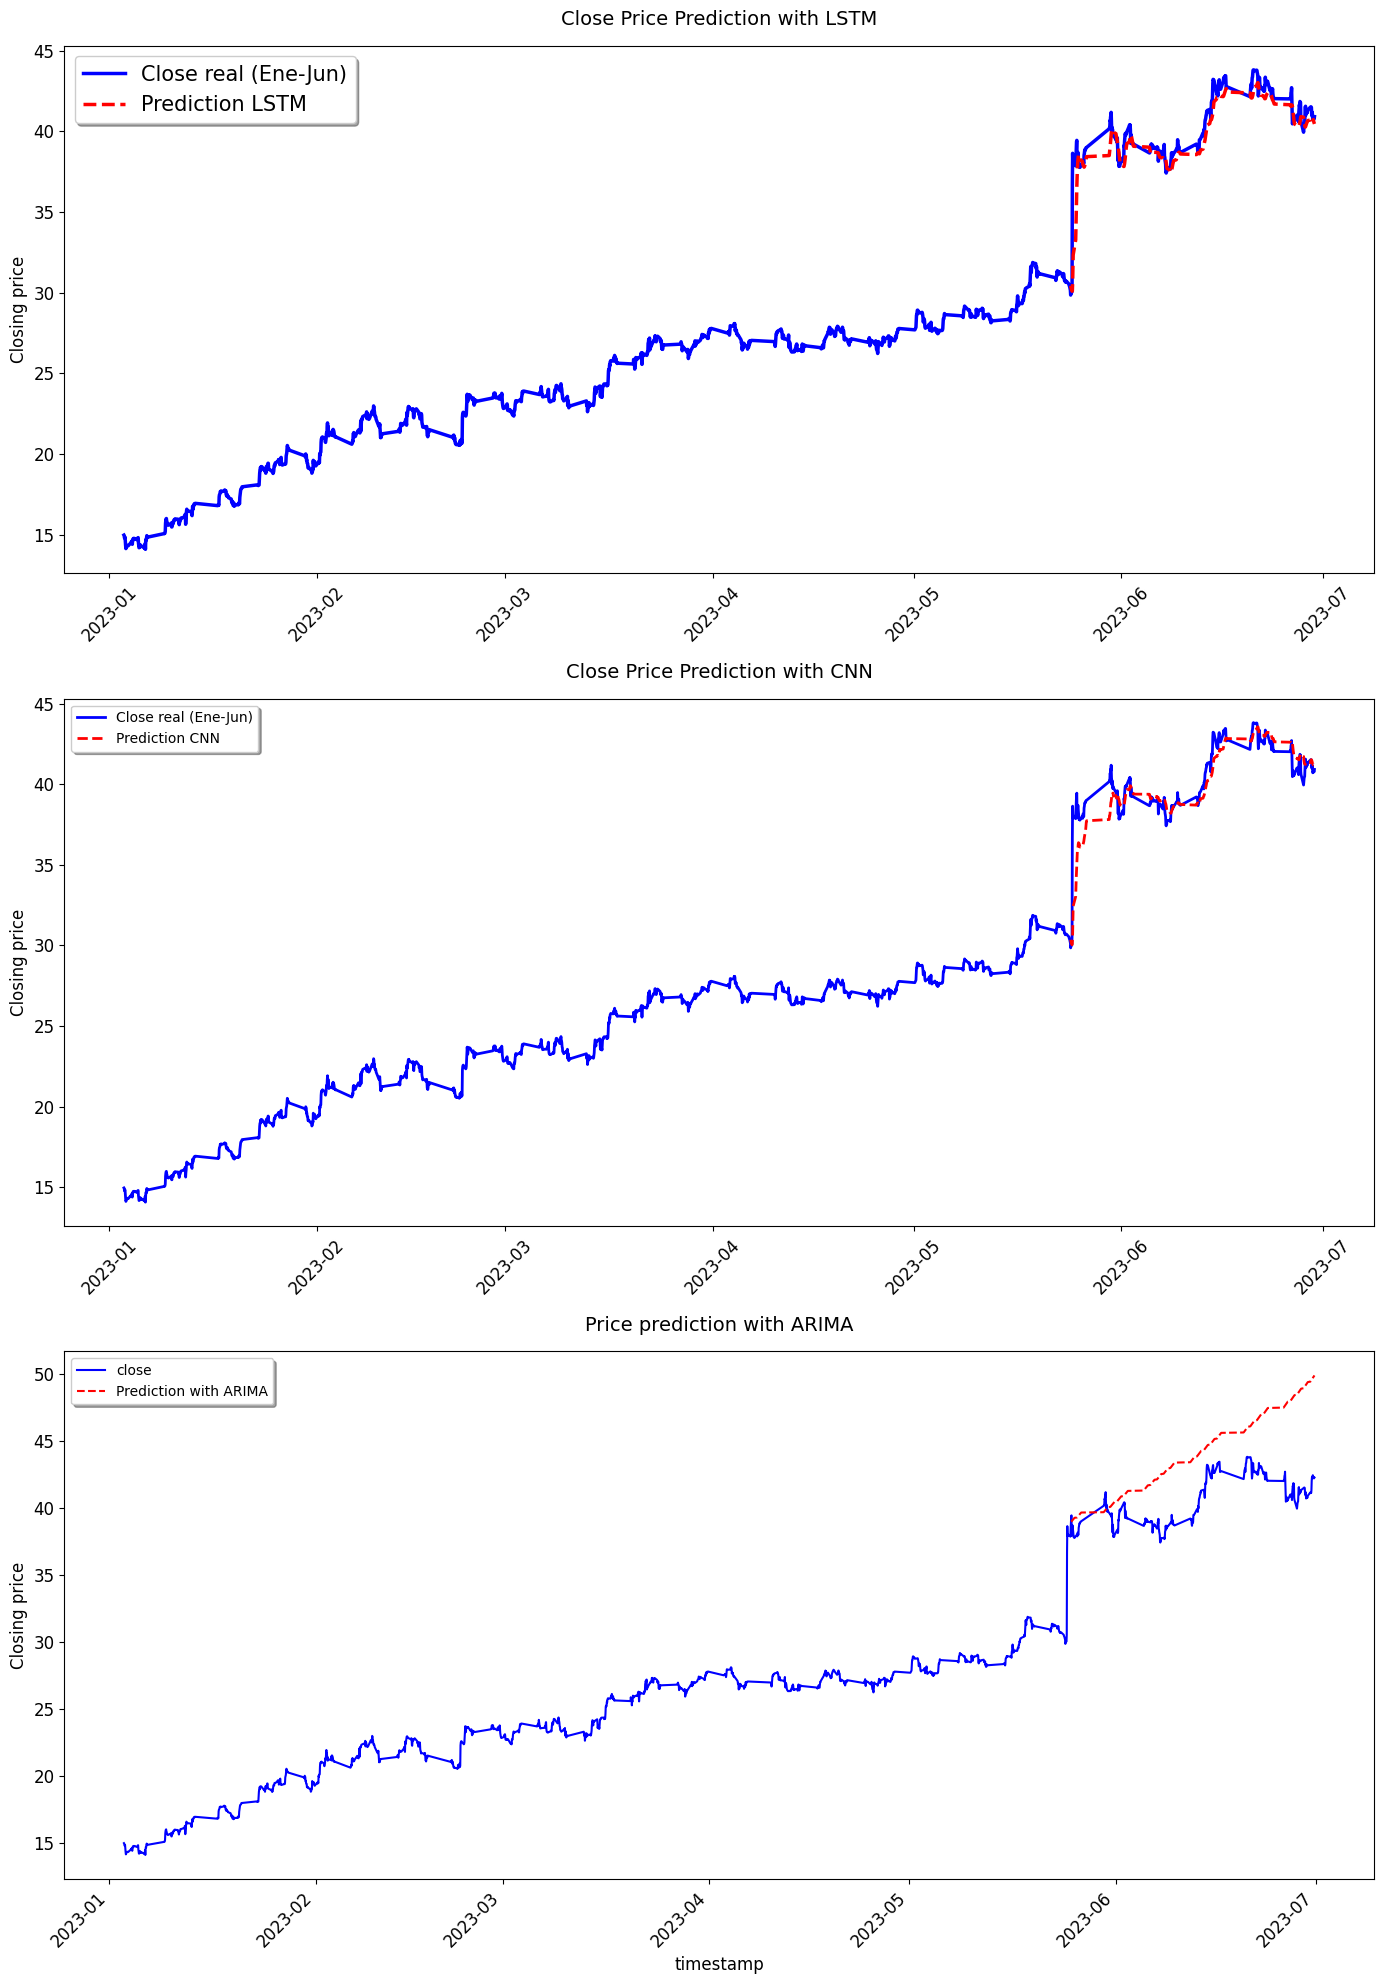

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Configuración común para todos los gráficos
plt.style.use('default')
plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplots(3, 1, figsize=(14, 20))  # Una columna, 5 filas
fig.patch.set_facecolor('white')

# Ajustar el espacio entre subplots
plt.subplots_adjust(hspace=0.5)

# ===== GRÁFICO 1: LSTM =====
ax = axs[0]
ax.plot(fechas, close_real, label='Close real (Ene-Jun)', linewidth=2.5, color='blue')
ax.plot(fechas, pred_plot_LSTM, label='Prediction LSTM', color='red', linestyle='--', linewidth=2.5)
ax.set_title('Close Price Prediction with LSTM', fontsize=14, pad=15)
ax.set_ylabel('Closing price', fontsize=12)
ax.legend(prop={'size': 15}, frameon=True, shadow=True, loc='upper left')
ax.get_legend().get_frame().set_facecolor('white')
ax.grid(False)
ax.tick_params(axis='x', rotation=45)

# ===== GRÁFICO 2: CNN =====
ax = axs[1]
ax.plot(fechas, close_real, label='Close real (Ene-Jun)', linewidth=2, color='blue')
ax.plot(fechas, pred_plot_CNN, label='Prediction CNN', color='red', linestyle='--', linewidth=2)
ax.set_title('Close Price Prediction with CNN', fontsize=14, pad=15)
ax.set_ylabel('Closing price', fontsize=12)
ax.legend(prop={'size': 15}, frameon=True, shadow=True, loc='upper left')
ax.get_legend().get_frame().set_facecolor('white')
ax.grid(False)
ax.tick_params(axis='x', rotation=45)

# ===== GRÁFICO 3: ARIMA =====
ax = axs[2]
data.plot(ax=ax, label='Close real (Ene-Jun)', color='blue')
predicted_mean_ARIMA.plot(ax=ax, label='Prediction with ARIMA', color='red', linestyle='--')
#ax.fill_between(test_data.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='k', alpha=.2)
ax.set_title('Price prediction with ARIMA', fontsize=14, pad=15)
ax.set_ylabel('Closing price', fontsize=12)
ax.legend(prop={'size': 15}, frameon=True, shadow=True, loc='upper left')
ax.get_legend().get_frame().set_facecolor('white')
ax.grid(False)
ax.tick_params(axis='x', rotation=45)


# Centrar los gráficos en la página
plt.tight_layout()
plt.show()

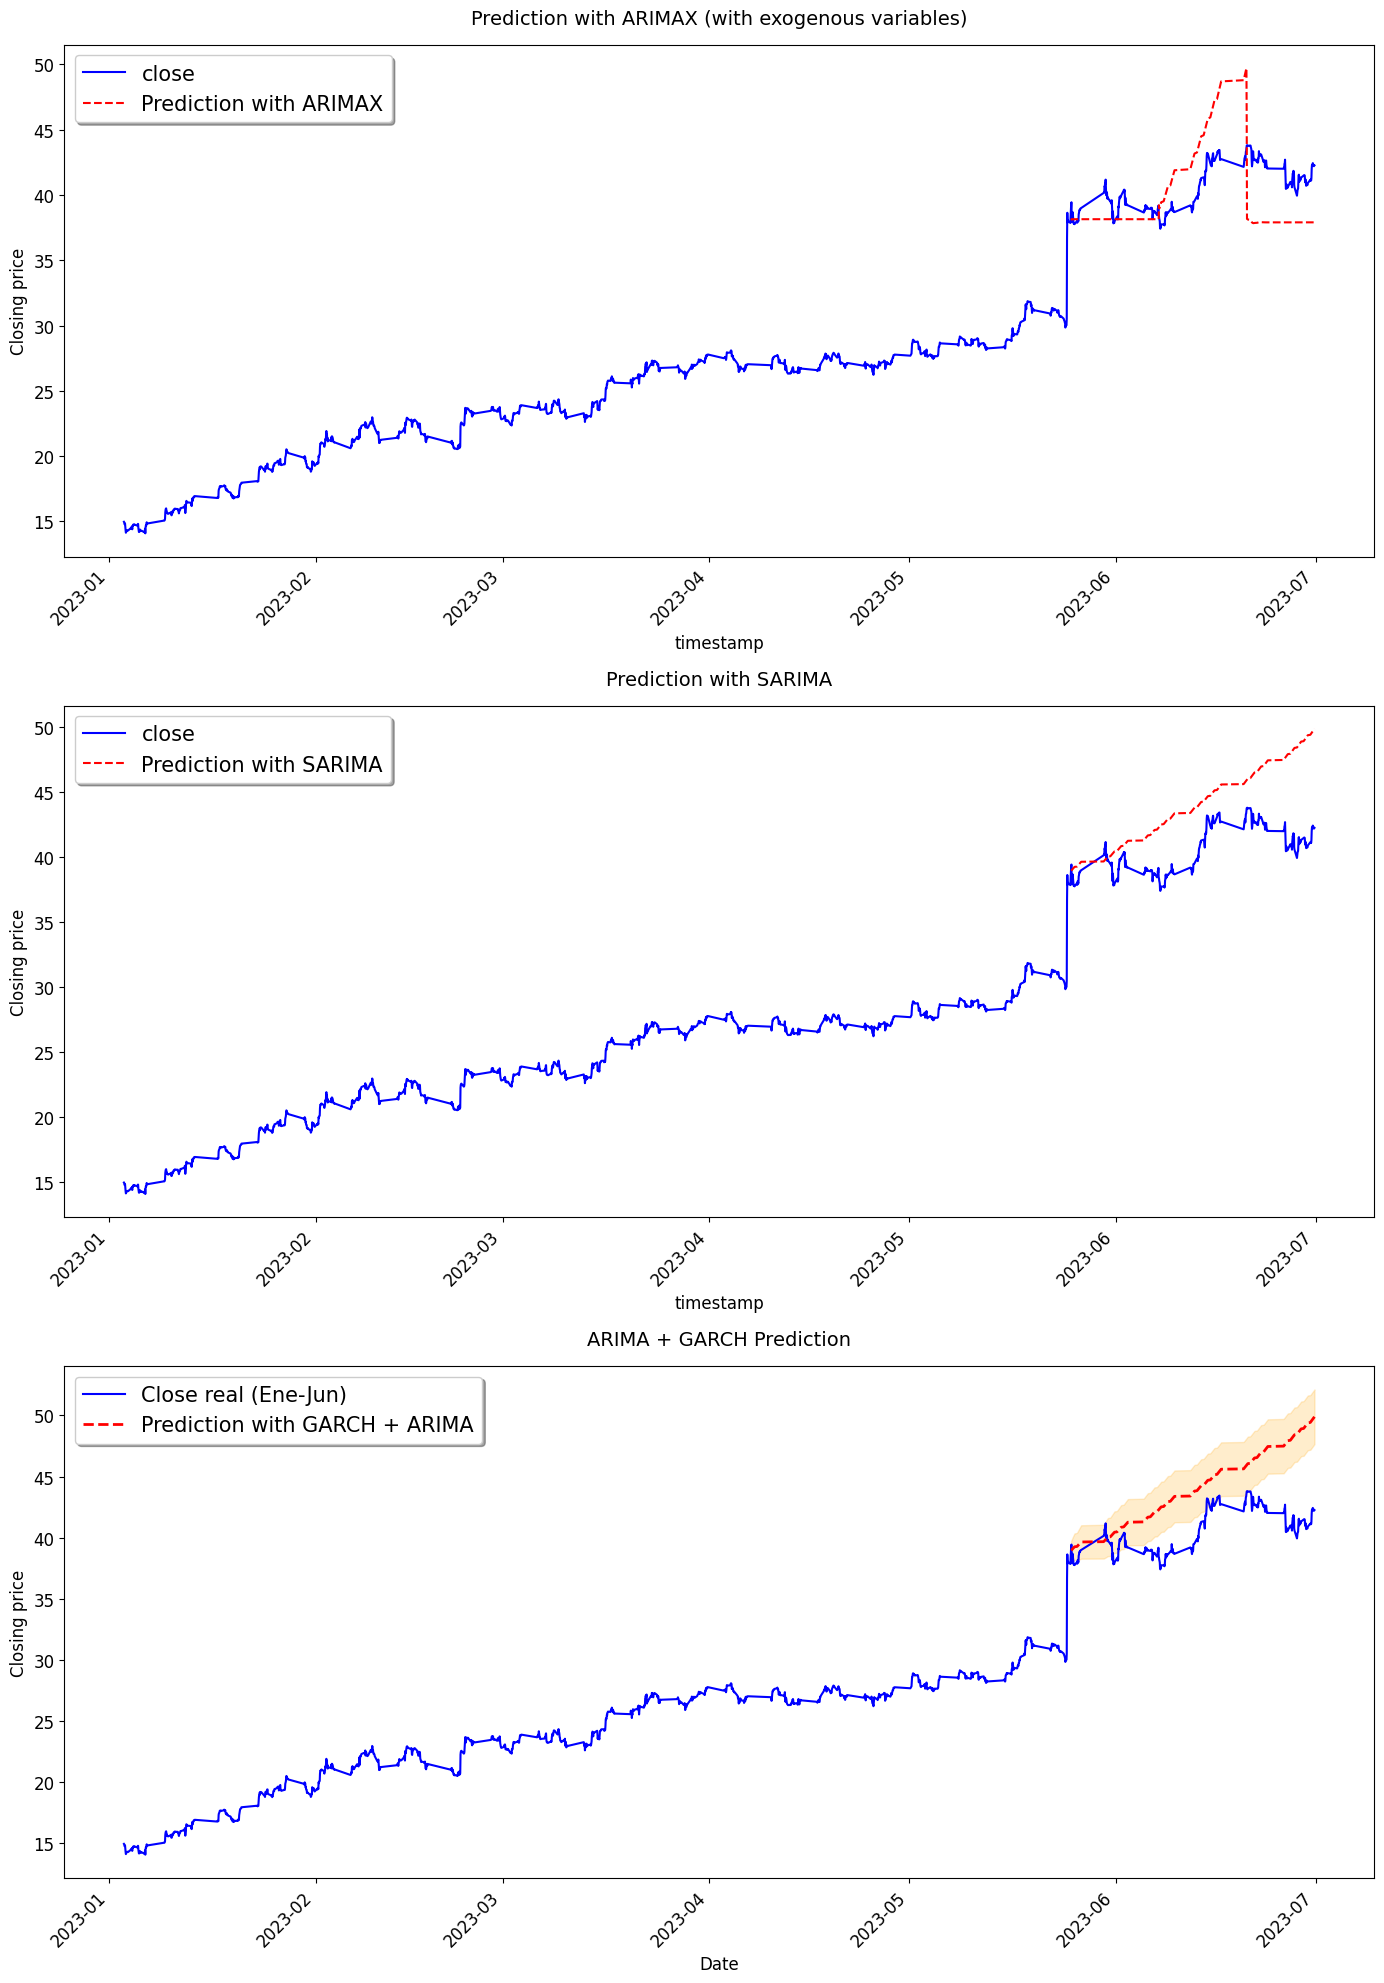

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Configuración común para todos los gráficos
plt.style.use('default')
plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplots(3, 1, figsize=(14, 20))  
fig.patch.set_facecolor('white')

# Ajustar el espacio entre subplots
plt.subplots_adjust(hspace=0.5)
# ===== GRÁFICO 4: ARIMAX =====
ax = axs[0]
y.plot(ax=ax, label='Close real (Ene-Jun)', color='blue')
predicted_mean_ARIMAX.plot(ax=ax, label='Prediction with ARIMAX', color='red', linestyle='--')
#ax.fill_between(test_y.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.3)
ax.set_title('Prediction with ARIMAX (with exogenous variables)', fontsize=14, pad=15)
ax.set_ylabel('Closing price', fontsize=12)
ax.legend(prop={'size': 15}, frameon=True, shadow=True, loc='upper left')
ax.get_legend().get_frame().set_facecolor('white')
ax.grid(False)
ax.tick_params(axis='x', rotation=45)

# ===== GRÁFICO 5: SARIMA =====

ax = axs[1]
y.plot(ax=ax, label='Close real (Ene-Jun)', color='blue')
predicted_mean_SARIMA.plot(ax=ax, label='Prediction with SARIMA', color='red', linestyle='--')
#ax.fill_between(test_y.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='yellow', alpha=0.3)
ax.set_title('Prediction with SARIMA', fontsize=14, pad=15)
ax.set_ylabel('Closing price', fontsize=12)
ax.legend(prop={'size': 15}, frameon=True, shadow=True, loc='upper left')
ax.get_legend().get_frame().set_facecolor('white')
ax.grid(False)
ax.tick_params(axis='x', rotation=45)


# ===== GRÁFICO 6: GARCH + ARIMA =====
ax = axs[2]
data['close'].plot(ax=ax, label='Close real (Ene-Jun)', color='blue')
pred_filtered_GA.plot(ax=ax, label='Prediction with GARCH + ARIMA', color='red', linewidth=2, linestyle='--')
ax.fill_between(lower_filtered.index, lower_filtered, upper_filtered, color='orange', alpha=0.2)
ax.set_title('ARIMA + GARCH Prediction', fontsize=14, pad=15)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Closing price', fontsize=12)
ax.legend(prop={'size': 15}, frameon=True, shadow=True, loc='upper left')
ax.get_legend().get_frame().set_facecolor('white')
ax.grid(False)
ax.tick_params(axis='x', rotation=45)
# Centrar los gráficos en la página
plt.tight_layout()
plt.show()